In [5]:
# HIDDEN

from datascience import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In this section, we will continue to use the <code><a href="imdb.csv">imdb.csv</a></code> data set.

In [6]:
imdb = Table.read_table('imdb.csv')

Functions can be used to compute new columns in a table based on existing column values. For example, the IMDb dataset of top grossing movies placed the year of each movie in the title. To categorize the data by year, we first must separate the title from the date.

**Slicing**. Titles are strings, and a string is a sequence. Any sequence can be *sliced*, creating a new sequence of the same type that has only a range of the original elements. To slice a sequence, place two indices separated by a colon within square brackets. While slicing has a new syntax, slices have the same behavior as the arguments to `np.arange`: the first number is an inclusive lower bound and the second argument is an exclusive upper bound.

In [7]:
title = "Terminator 2: Judgment Day (1991)"
title[3:10]

'minator'

Negative indices in a slice (or in element selection) count from the end of the sequence. Since years of movies in this data set always contain exactly 4 numbers, we can separate the date from the title using a slice and negative constants.

In [8]:
title[-5:-1]

'1991'

The `year` function below takes in a movie title with the year at the end, slices out the year, and converts the result to an integer by calling `int`.

In [9]:
def year(title):
    """Return the year of a movie, assuming it appears at the end of the title."""
    return int(title[-5:-1])

year(title)

1991

**Apply.** The `apply` method of a table calls a function on each element of a column, forming a new array of return values. To indicate which function to call, just name it (without quotation marks). The name of the column of input values must still appear within quotation marks.

In [10]:
imdb['year'] = imdb.apply(year, 'movie')
imdb

rank,movie,boxoffice,in_millions,year
1,Avatar (2009),760505847,760.506,2009
2,Titanic (1997),658672302,658.672,1997
3,Jurassic World (2015),642978555,642.979,2015
4,The Avengers (2012),623279547,623.28,2012
5,The Dark Knight (2008),533316061,533.316,2008
6,Star Wars: Episode I - The Phantom Menace (1999),474544677,474.545,1999
7,Star Wars (1977),460935665,460.936,1977
8,Avengers: Age of Ultron (2015),457744064,457.744,2015
9,The Dark Knight Rises (2012),448130642,448.131,2012
10,Shrek 2 (2004),436471036,436.471,2004


Computing Categories
-------------------

Functions can also be used to create categories based on existing columns. The first step in categorizing data is to write a function that can take existing column values as arguments and return a category label. Then, a new column for that category can be added using `apply`, as in the example above.

Certain science fiction films have pushed the limits of special effects technology. The movie E.T., released in 1982, made audiences believe in aliens. Jurassic Park, released in 1993, delivered the most convincing images of dinosaurs ever created. Avatar, released in 2009, created realistic humanoid aliens in immersive 3-dimensional films. We can use these landmarks of special effects technology to categorize the history of cinema.

In [11]:
def age(year):
    if year < 1982:
        return 'old'
    elif year < 1993:
        return 'modern'
    elif year < 2009:
        return 'recent'
    else:
        return 'contemporary'
    
imdb['era'] = imdb.apply(age, 'year')
imdb

rank,movie,boxoffice,in_millions,year,era
1,Avatar (2009),760505847,760.506,2009,contemporary
2,Titanic (1997),658672302,658.672,1997,recent
3,Jurassic World (2015),642978555,642.979,2015,contemporary
4,The Avengers (2012),623279547,623.28,2012,contemporary
5,The Dark Knight (2008),533316061,533.316,2008,recent
6,Star Wars: Episode I - The Phantom Menace (1999),474544677,474.545,1999,recent
7,Star Wars (1977),460935665,460.936,1977,old
8,Avengers: Age of Ultron (2015),457744064,457.744,2015,contemporary
9,The Dark Knight Rises (2012),448130642,448.131,2012,contemporary
10,Shrek 2 (2004),436471036,436.471,2004,recent


Once a new category column is introduced, it can be used to perform any sort of further processing. For instance, we could count how many movies come from each era. 

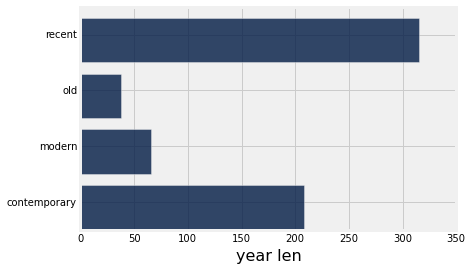

In [12]:
imdb.select(['era', 'year']).group('era', len).barh('era')

Functions can also be used to generate visualizations from tables. Histograms of the eras show quite a contrast in the distribution of movie proceeds over the years. What changes might explain the trend you observe? How might you investigate whether that change accounts for the trend?

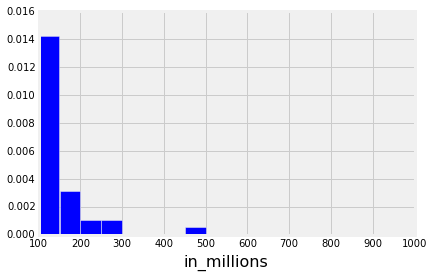

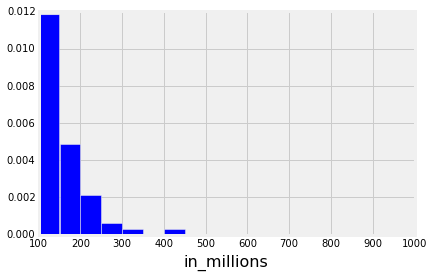

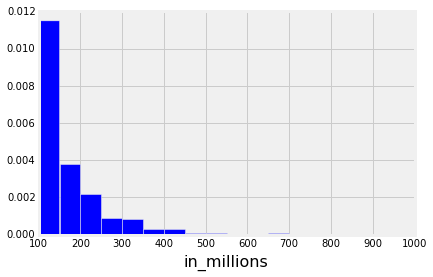

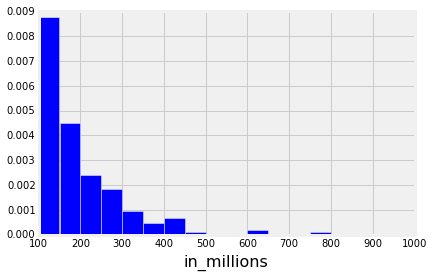

In [13]:
def age_hist(age):
    imdb.where('era', age).select(['in_millions']).hist(
        bins=np.arange(100, 1000, 50), 
        normed=True)
    
age_hist('old')
age_hist('modern')
age_hist('recent')
age_hist('contemporary')